In [1]:
import numpy as np
from math import e
import matplotlib.pyplot as plt
from scipy import linalg as LA
from scipy import integrate
from sklearn.metrics import mean_squared_error

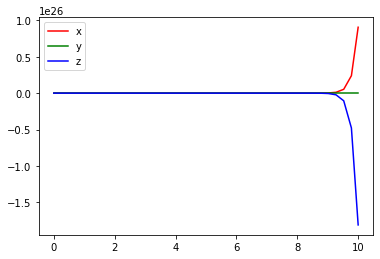

the numerical solution is [9.054661286697442e+25, 0.0, -1.8109322573394884e+26]
(  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 248
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.04939843,  0.22485912,  0.44825404,  0.69026744,
        0.93898721,  1.19011533,  1.4421408 ,  1.69451605,  1.94703326,
        2.19960994,  2.45221211,  2.70482539,  2.95744356,  3.2100639 ,
        3.46268521,  3.71530695,  3.96792888,  4.2205509 ,  4.47317296,
        4.72579504,  4.97841712,  5.23103921,  5.4836613 ,  5.73628339,
        5.98890548,  6.24152757,  6.49414966,  6.74677175,  6.99939384,
        7.25201593,  7.50463802,  7.75726011,  8.0098822 ,  8.26250429,
        8.51512638,  8.76774847,  9.02037056,  9.27299265,  9.52561474,
        9.77823683, 10.        ])
 t_events: None
        y: array([[ 2.00000000e+00,  2.33676307e+00,  4.58596425e+00,
         1.36579178e+01,  5.27058643e+01,  2

In [2]:
def linear_system(t,Y,params):
    #param    the array containing all the entries of a matrix
    #this is a function that describes a linear system dX=AX, where A is n by n, X is n by 1
    c11=params[0]
    c12=params[1]
    c13=params[2]
    c21=params[3]
    c22=params[4]
    c23=params[5]
    c31=params[6]
    c32=params[7]
    c33=params[8]
    x=Y[0]
    y=Y[1]
    z=Y[2]
    dx=c11*x+c12*y+c13*z
    dy=c21*x+c22*y+c23*z
    dz=c31*x+c32*y+c33*z
    return([dx,dy,dz])

def num_solve(func,tspan,y0,params):
    sol=integrate.solve_ivp(func,tspan,y0,args=(params,))
    T=sol.t
    X=sol.y
    Y=[]
    x=X[0]
    y=X[1]
    z=X[2]
    plt.plot(T,x,'r')
    plt.plot(T,y,'g')
    plt.plot(T,z,'b')
    plt.legend(['x','y','z'])
    plt.show()
    x=x[-1]
    y=y[-1]
    z=z[-1]
    Y.append(x)
    Y.append(y)
    Y.append(z)
    print('the numerical solution is',Y)
    return sol,Y #returning a tuple such that the first term in the tuple is the solution containing time array and 
#value array, the second term in the tuple is simply the answer

tspan=[0,10]
y0=[2,0,-1]
params=(2,0,-2,0,4,0,-2,0,5)
numerical_solution=num_solve(linear_system,tspan,y0,params)#the numerical solution using RK45
print(numerical_solution)

In [3]:
def matrix(params):
    #turning the array as a matrix
    params=np.array(params)
    params=np.reshape(params,(3,3))
    return params

def cons_generator(matrix,Y):
    #Y      initial conditions
    w,v=LA.eigh(matrix)
    C=np.linalg.solve(v,Y)
    return C

def analy_solve(t,matrix,cons_params):
    #solving a linear system dX=AX using the most general solution
    #cons_params    containing n constants for n terms in the general solution
    X=[]
    w,v=LA.eigh(matrix)
    L=len(w)
    for i in range(L):
        e_term=cons_params[i]*(e**(w[i]*t))
        y=np.dot(e_term,v[:,i])
        X.append(y)
        Y=np.sum(X,axis=0)
    return Y
    #the function eventually returns the explicit solution
    
params=(2,0,-2,0,4,0,-2,0,5)
A=matrix(params)
Y=[2,0,-1]
cons_params=cons_generator(A,Y)
print('the constants terms in the general solution are',cons_params)
explicit_solution=analy_solve(10,A,cons_params)
numerical_solution=numerical_solution[-1]
MSE=mean_squared_error(explicit_solution,numerical_solution)
print('the numerical solution is',numerical_solution,', the actual solution is',explicit_solution,', the mean square error is',MSE,'.' )

the constants terms in the general solution are [ 1.34164079  0.         -1.78885438]
the numerical solution is [9.054661286697442e+25, 0.0, -1.8109322573394884e+26] , the actual solution is [ 9.13605912e+25  0.00000000e+00 -1.82721182e+26] , the mean square error is 1.1042678377166507e+48 .


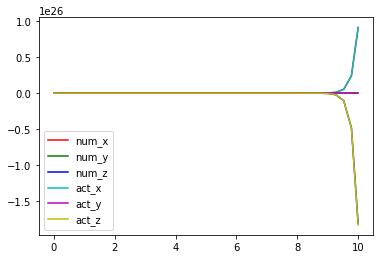

In [4]:
def plot(func,tspan,y0,params):
    sol=integrate.solve_ivp(func,tspan,y0,args=(params,))
    T=sol.t
    X=sol.y
    x=X[0]
    y=X[1]
    z=X[2]
    act_sol=[]
    for t in T:
        sol=analy_solve(t,A,cons_params)
        act_sol.append(sol)
    act_sol=np.reshape(act_sol,(len(act_sol),3))
    plt.plot(T,x,'r')
    plt.plot(T,y,'g')
    plt.plot(T,z,'b')
    plt.plot(T,act_sol[:,0],'c')
    plt.plot(T,act_sol[:,1],'m')
    plt.plot(T,act_sol[:,2],'y')
    plt.legend(['num_x','num_y','num_z','act_x','act_y','act_z'])
    plt.show()
    
plot(linear_system,tspan,y0,params) #since the values are all so large it looks like there is no difference at all,
#but the code was correct